In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder

In [2]:
from tensorflow.python.client import device_lib
print('Available GPUs')
for d in device_lib.list_local_devices():
    print(d.physical_device_desc)

Available GPUs


In [3]:
# import the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training set dims', x_train.shape, y_train.shape)
print('Testing set dims', x_test.shape, y_test.shape)

Training set dims (60000, 28, 28) (60000,)
Testing set dims (10000, 28, 28) (10000,)


image data
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253

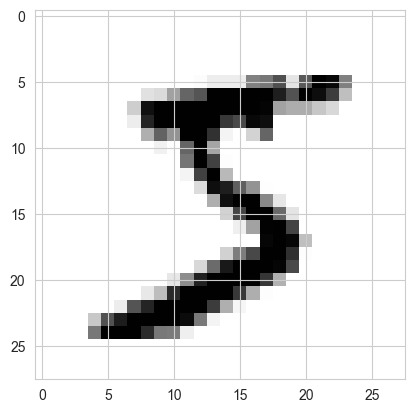

In [4]:
imageId = 0
print('image data')
print(x_train[imageId])
print('image label:', y_train[imageId])
# plot the sample

fig = plt.figure()
plt.imshow(x_train[imageId], cmap='gray_r')
plt.show()

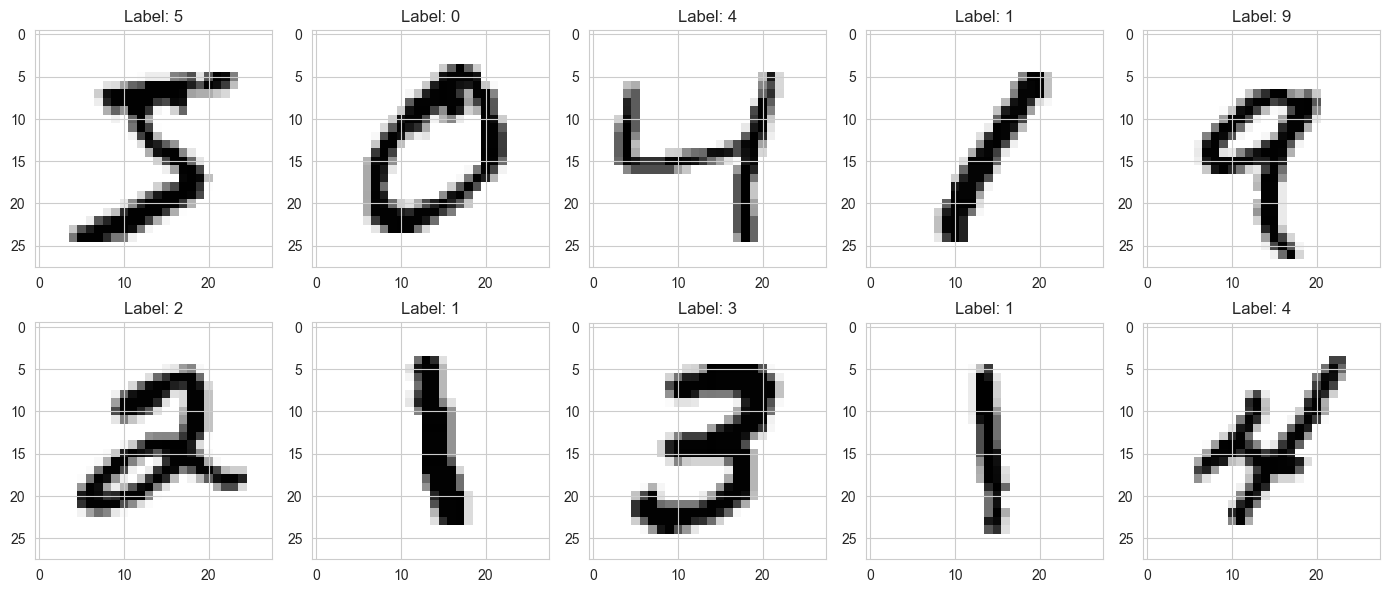

In [5]:
num_row = 2
num_col = 5
startImageId = 0

fig, axes = plt.subplots(num_row, num_col, figsize=(14, 6))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_train[i+startImageId], cmap='gray_r')
    ax.set_title('Label: {}'.format(y_train[i+startImageId]))
plt.tight_layout()
plt.show()

In [6]:
# Flatten each figure into a linear sequence of 784 pixels

n_figs = x_train.shape[0]
x_train = x_train.reshape(n_figs, 784)
n_figs = x_test.shape[0]
x_test = x_test.reshape(n_figs, 784)

# Convert each pixel from 0..255 into a [0, 1] interval (it is the equivalent of ScandarScaler)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# and OneHot enconding the target value
enc = OneHotEncoder()
Y_train = enc.fit_transform(y_train[:, np.newaxis]).toarray()


In [7]:
imageId=10

y_train[imageId], Y_train[imageId]

(3, array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]))

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

classifier = Sequential()
# Hidden Layer (using implicit input layer)
classifier.add(Dense(32, activation='sigmoid', kernel_initializer='random_normal', input_dim=784, name='HiddenLayer'))
# Output Layer
classifier.add(Dense(10, activation='softmax', kernel_initializer='random_normal', name='OutputLayer'))

# Compiling & fitting the neural network
classifier.compile(optimizer ='adam', loss='categorical_crossentropy', metrics =['accuracy'])

C:\Users\lucat\GitHub\AI_LAB\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Adam optimization is an extension to Stochastic gradient decent

See:

https://optimization.cbe.cornell.edu/index.php?title=Adam

https://www.geeksforgeeks.org/intuition-of-adam-optimizer

https://arxiv.org/pdf/1412.6980.pdf

In [9]:
print('data size:', x_train.shape[0], ' samples of ',x_train.shape[1], 'pixels')
display(classifier.summary());

data size: 60000  samples of  784 pixels


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ HiddenLayer (Dense)             │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

None

In [10]:
# number of coefficients input-->hidden layer
print(f'{784*32 + 32 = }')
# number of coefficients hidden layer--> output
print(f'{32*10 + 10 = }')

print(f'{(784*32 + 32) + (32*10 + 10) = }')

784*32 + 32 = 25120
32*10 + 10 = 330
(784*32 + 32) + (32*10 + 10) = 25450


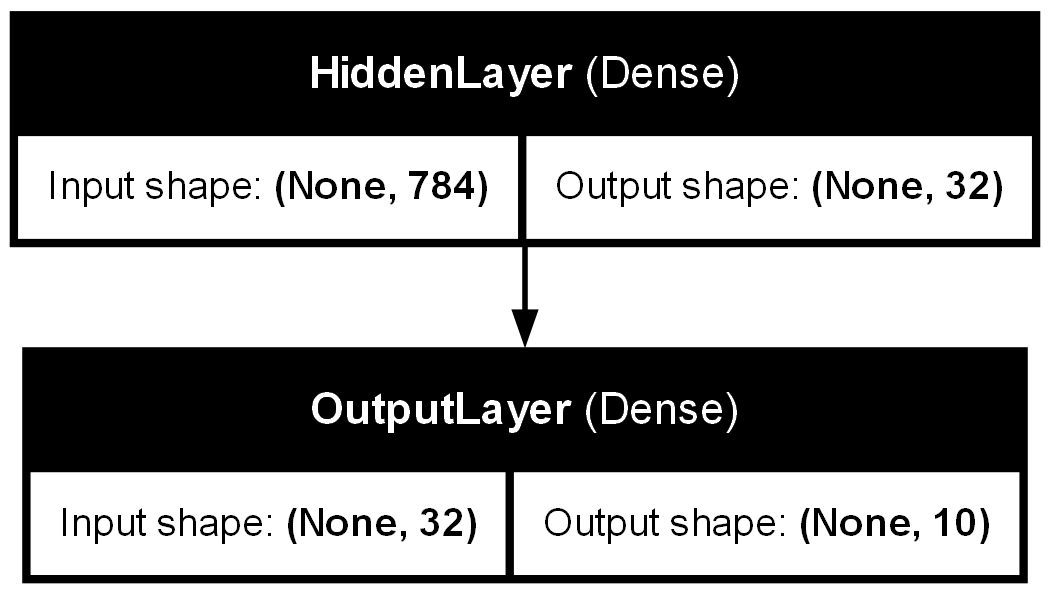

In [11]:
from  tensorflow.keras.utils import plot_model
plot_model(classifier, show_shapes=True, show_layer_names=True)

In [12]:
# using the full gradient descent
# history = classifier.fit(x_train, Y_train, epochs=20)
# using the mini batch gradient descent
history = classifier.fit(x_train, Y_train, batch_size=128, epochs=20)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6021 - loss: 1.6542
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8935 - loss: 0.4834
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9158 - loss: 0.3269
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9228 - loss: 0.2769
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9336 - loss: 0.2370
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9389 - loss: 0.2194
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9424 - loss: 0.2031
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9465 - loss: 0.1910
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9486 - loss: 0.1788
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9535 - loss: 0.1662
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9560 - loss: 0.1531
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


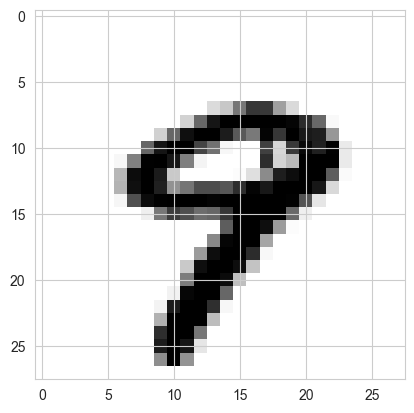

   digit          prob
0      0  6.467011e-06
1      1  2.259067e-07
2      2  1.102746e-05
3      3  3.834681e-06
4      4  4.642503e-03
5      5  1.294075e-05
6      6  8.869823e-06
7      7  1.007942e-02
8      8  1.852749e-04
9      9  9.850494e-01


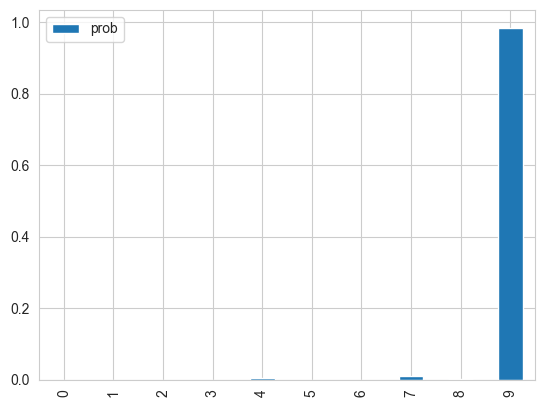

In [13]:
imageId=9

yp = classifier.predict(x_test[imageId].reshape(-1,784))

fig = plt.figure
plt.imshow(x_test[imageId].reshape(28,28), cmap='gray_r')
plt.show()

yp_table = pd.DataFrame(np.arange(0,10), columns=['digit'])
yp_table['prob'] = np.transpose(yp)

yp_table.iloc[:, 1:].plot(kind='bar')
print(yp_table)

In [14]:
np.argmax(yp)

9

In [15]:
history.history

{'accuracy': [0.7560666799545288,
  0.9003999829292297,
  0.9175333380699158,
  0.9262166619300842,
  0.9332333207130432,
  0.9391833543777466,
  0.9432333111763,
  0.9474499821662903,
  0.9503999948501587,
  0.9529666900634766,
  0.9556499719619751,
  0.9575666785240173,
  0.9593999981880188,
  0.9614166617393494,
  0.9626833200454712,
  0.9641666412353516,
  0.9658833146095276,
  0.966866672039032,
  0.9680333137512207,
  0.9696999788284302],
 'loss': [1.1679763793945312,
  0.4293844699859619,
  0.3127110004425049,
  0.2651113271713257,
  0.23620538413524628,
  0.2154419869184494,
  0.19923117756843567,
  0.18601013720035553,
  0.1748969703912735,
  0.16522802412509918,
  0.15648765861988068,
  0.14905965328216553,
  0.14192979037761688,
  0.13559095561504364,
  0.13033808767795563,
  0.12519869208335876,
  0.1204618513584137,
  0.11599133908748627,
  0.11192716658115387,
  0.10798592865467072]}

(0.0, 1.0)

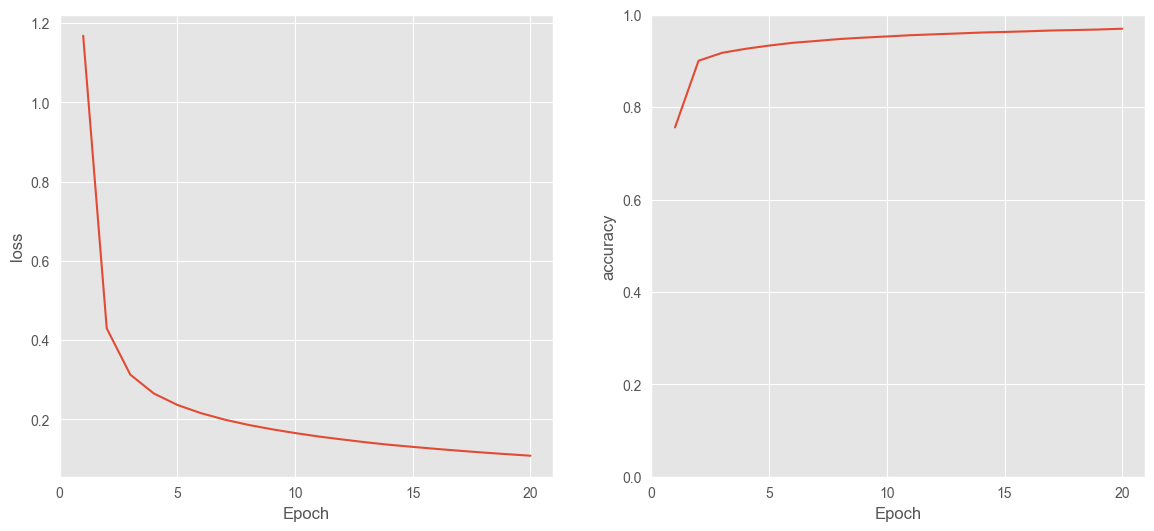

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
# plt.plot(history.history['loss'])
plt.plot(np.arange(1,21,1), history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.xticks([0,5,10,15,20])
plt.subplot(1,2,2)
plt.plot(np.arange(1,21,1),history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.xticks([0,5,10,15,20])
plt.ylim(0,1)

In [17]:
y_pred = np.argmax(classifier.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step


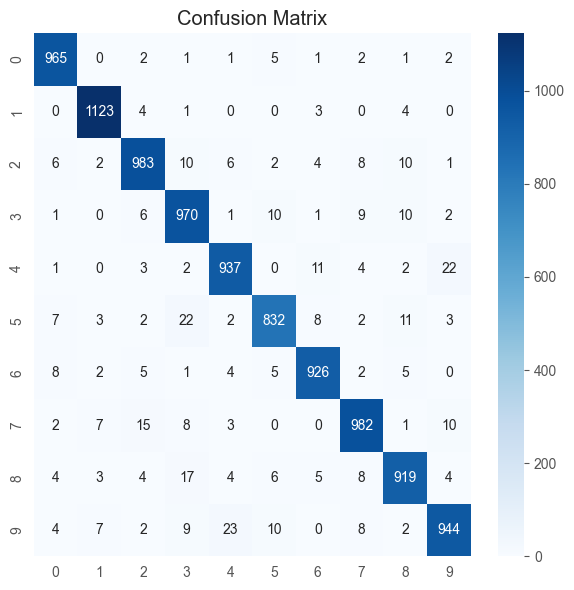

In [18]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6, 6), tight_layout=True)
ax = plt.axes()
sns.heatmap(cm, annot=True, annot_kws={"size": 10}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [19]:
Y_test = enc.transform(y_test[:, np.newaxis]).toarray()

scores = classifier.evaluate(x_test, Y_test)

for i in range(len(classifier.metrics_names)):
    print(classifier.metrics_names[i], scores[i])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.9519 - loss: 0.1557
loss 0.1367132067680359
compile_metrics 0.9581000208854675


In [20]:
np.where(y_pred != y_test)

(array([  66,  151,  247,  259,  290,  300,  321,  340,  352,  381,  425,
         445,  448,  495,  507,  543,  551,  565,  569,  578,  583,  591,
         610,  619,  659,  691,  707,  717,  740,  760,  839,  844,  874,
         882,  924,  951,  956,  965, 1003, 1014, 1032, 1039, 1044, 1107,
        1112, 1114, 1124, 1128, 1182, 1191, 1192, 1226, 1232, 1234, 1242,
        1247, 1253, 1256, 1260, 1283, 1289, 1290, 1299, 1319, 1326, 1364,
        1378, 1393, 1413, 1414, 1422, 1433, 1440, 1444, 1500, 1522, 1525,
        1527, 1530, 1549, 1553, 1581, 1601, 1607, 1609, 1640, 1641, 1678,
        1681, 1709, 1717, 1732, 1737, 1751, 1754, 1772, 1790, 1878, 1901,
        1917, 1938, 1941, 1952, 1969, 1970, 1982, 2004, 2016, 2024, 2035,
        2040, 2043, 2044, 2053, 2070, 2073, 2098, 2109, 2118, 2129, 2130,
        2131, 2135, 2182, 2185, 2186, 2189, 2224, 2266, 2272, 2291, 2293,
        2299, 2326, 2329, 2339, 2369, 2387, 2393, 2395, 2406, 2408, 2414,
        2422, 2433, 2454, 2488, 2514, 

ground truth 7  predicted label 2


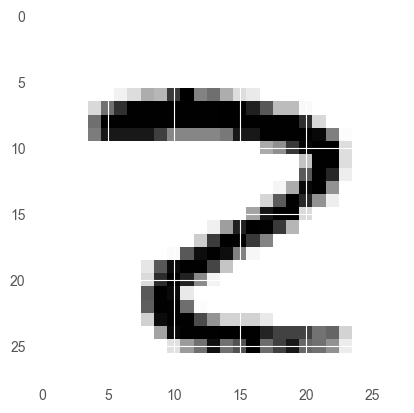

In [21]:
imageId = 2044

print(f"ground truth {y_pred[imageId]}  predicted label {y_test[imageId]}") 

plt.imshow(x_test[imageId].reshape(28,28), cmap='gray_r')
plt.show()